In [223]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set()

In [224]:
df = pd.read_csv('prepared_data.csv', index_col=0)
df.head()

,link,price,description_len,general_sq,floor,built,ceil,parking,time_to_underground,address,...,new_building,courtyard_view,road_view,district,rooms,wc_amount,joint_wc,balcony,living_square_ratio,placed_days_ago
0,https://www.cian.ru/sale/flat/258447697/,2280000.0,1623.0,11.4,4,1961.0,3.5,наземная,15.0,"Москва, ВАО, р-н Северное Измайлово, Сиреневый...",...,False,True,False,ВАО,1,1,True,0,0.500000,12
1,https://www.cian.ru/sale/flat/258452553/,2310000.0,1620.0,11.4,4,1961.0,3.5,наземная,15.0,"Москва, ВАО, р-н Северное Измайлово, Сиреневый...",...,False,True,False,ВАО,студия,1,True,0,0.500000,12
3,https://www.cian.ru/sale/flat/256222498/,2700000.0,1137.0,13.0,4,1980.0,4.0,наземная,15.0,"Москва, ВАО, р-н Северное Измайлово, Сиреневый...",...,False,False,True,ВАО,студия,1,True,0,0.500000,7
4,https://www.cian.ru/sale/flat/260273278/,2750000.0,380.0,18.0,2,1952.0,3.3,наземная,6.0,"Москва, НАО (Новомосковский), Щербинка, ул. Лю...",...,False,True,False,НАО (Новомосковский),1,1,True,0,0.888889,13
5,https://www.cian.ru/sale/flat/258740783/,2790000.0,1375.0,18.0,7,2021.0,2.8,наземная,12.0,"Москва, ЮВАО, р-н Нижегородский, Подъемная ул....",...,False,False,True,ЮВАО,студия,1,True,0,0.555556,13


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7697 entries, 0 to 9294
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   link                 7697 non-null   object 
 1   price                7697 non-null   float64
 2   description_len      7697 non-null   float64
 3   general_sq           7697 non-null   float64
 4   floor                7697 non-null   int64  
 5   built                7697 non-null   float64
 6   ceil                 7697 non-null   float64
 7   parking              7697 non-null   object 
 8   time_to_underground  7697 non-null   float64
 9   address              7697 non-null   object 
 10  offer_dt             7697 non-null   object 
 11  all_views            7697 non-null   float64
 12  today_views          7697 non-null   float64
 13  total_floors         7697 non-null   int64  
 14  apartments           7697 non-null   bool   
 15  new_building         7697 non-null   b

In [226]:
corr = df.corr()
corr.style.background_gradient()

,price,description_len,general_sq,floor,built,ceil,time_to_underground,all_views,today_views,total_floors,apartments,new_building,courtyard_view,road_view,wc_amount,joint_wc,balcony,living_square_ratio,placed_days_ago
price,1.000000,-0.152443,0.555881,0.110353,-0.124149,-0.175955,-0.145961,-0.139156,-0.290819,0.133836,-0.343201,-0.075197,0.105945,0.018418,0.055257,-0.170196,0.179140,-0.154532,0.045613
description_len,-0.152443,1.000000,0.057930,0.088288,0.146672,0.085606,0.132764,-0.096431,-0.107277,0.142770,0.067682,0.461360,-0.211717,0.028619,0.077883,0.142452,-0.148603,-0.129270,-0.208493
general_sq,0.555881,0.057930,1.000000,-0.050263,0.008382,-0.117439,0.313807,-0.043358,-0.101405,-0.080425,-0.295047,-0.002562,0.019069,0.028675,0.226078,-0.262749,0.289711,-0.161534,0.032659
floor,0.110353,0.088288,-0.050263,1.000000,0.204526,-0.023105,-0.073112,-0.104428,-0.117412,0.513678,-0.073970,0.246262,-0.082236,0.039556,-0.033163,0.112028,0.029368,-0.174524,-0.046883
built,-0.124149,0.146672,0.008382,0.204526,1.000000,0.139909,0.090202,-0.066472,-0.066097,0.294508,0.097986,0.135546,-0.121124,0.060792,0.029461,0.100160,0.004142,-0.179475,-0.060815
ceil,-0.175955,0.085606,-0.117439,-0.023105,0.139909,1.000000,-0.009079,0.017472,0.085691,-0.022602,0.274487,0.096980,-0.055963,0.029607,0.055346,0.097457,-0.124805,-0.032169,-0.083369
time_to_underground,-0.145961,0.132764,0.313807,-0.073112,0.090202,-0.009079,1.000000,-0.051758,-0.053702,-0.147628,-0.165476,0.032186,-0.070246,-0.005067,0.089281,-0.075275,0.166877,-0.041604,-0.033285
all_views,-0.139156,-0.096431,-0.043358,-0.104428,-0.066472,0.017472,-0.051758,1.000000,0.311430,-0.144927,0.152205,-0.169948,0.049666,0.022706,-0.004946,-0.052905,-0.013440,0.135724,0.142878
today_views,-0.290819,-0.107277,-0.101405,-0.117412,-0.066097,0.085691,-0.053702,0.311430,1.000000,-0.176097,0.149388,-0.218125,0.056595,0.002020,-0.010946,-0.036059,-0.011917,0.145969,0.008474
total_floors,0.133836,0.142770,-0.080425,0.513678,0.294508,-0.022602,-0.147628,-0.144927,-0.176097,1.000000,-0.076368,0.422580,-0.151373,0.006397,-0.042686,0.128587,-0.126509,-0.276472,-0.093112


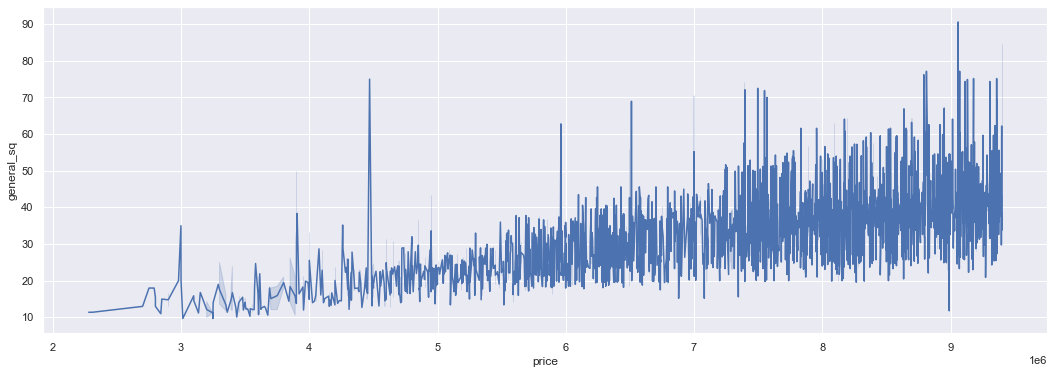

In [128]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x=df['price'], y=df['general_sq']);

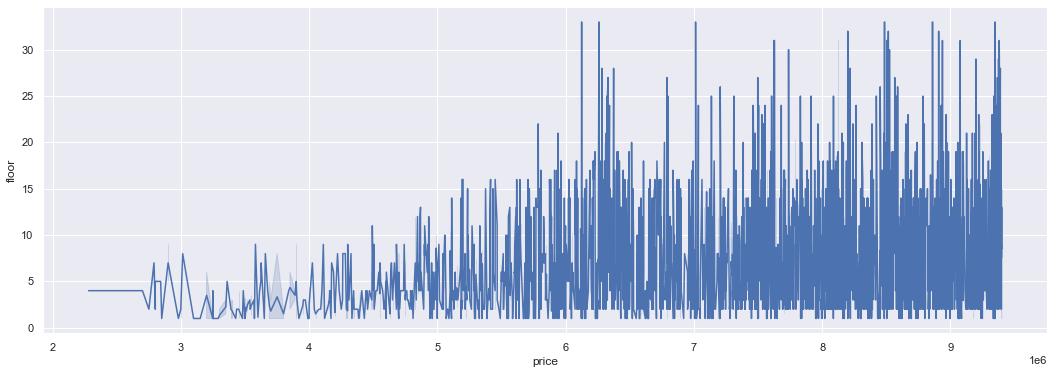

In [93]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x=df['price'], y=df['floor']);

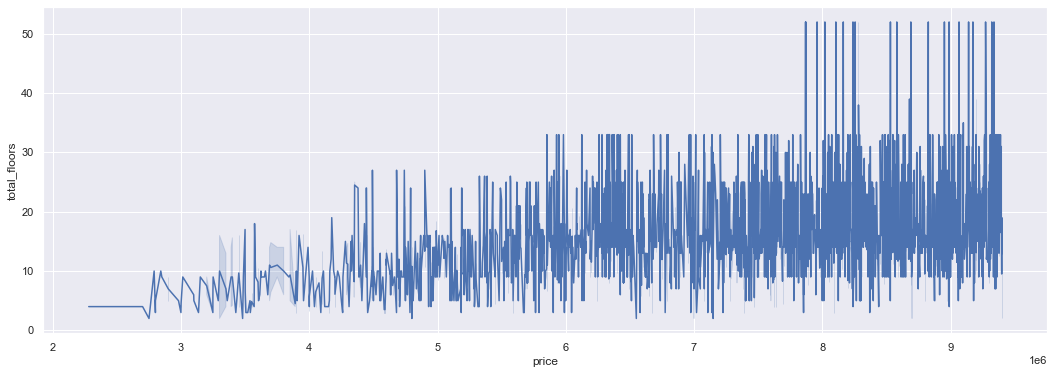

In [126]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x=df['price'], y=df['total_floors']);

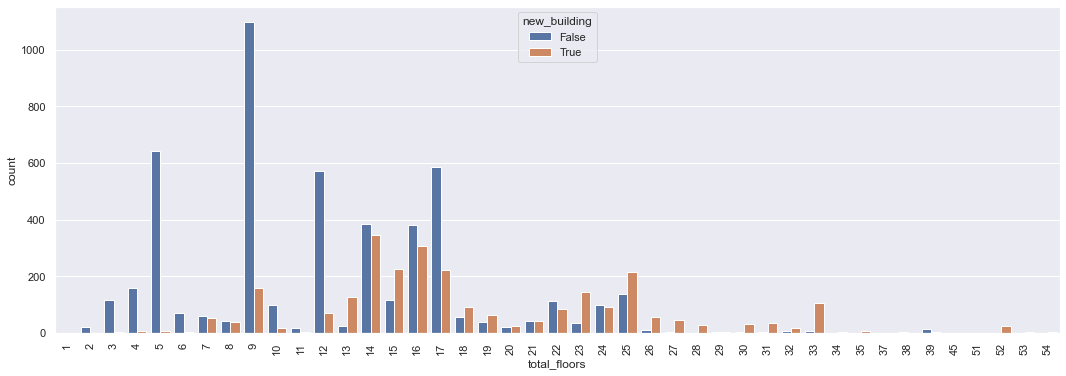

In [97]:
plt.figure(figsize=(18, 6))
general_sq_cnt_plt = sns.countplot(x=df['total_floors'], hue=df['new_building'])
general_sq_cnt_plt.set_xticklabels(general_sq_cnt_plt.get_xticklabels(), rotation=90);

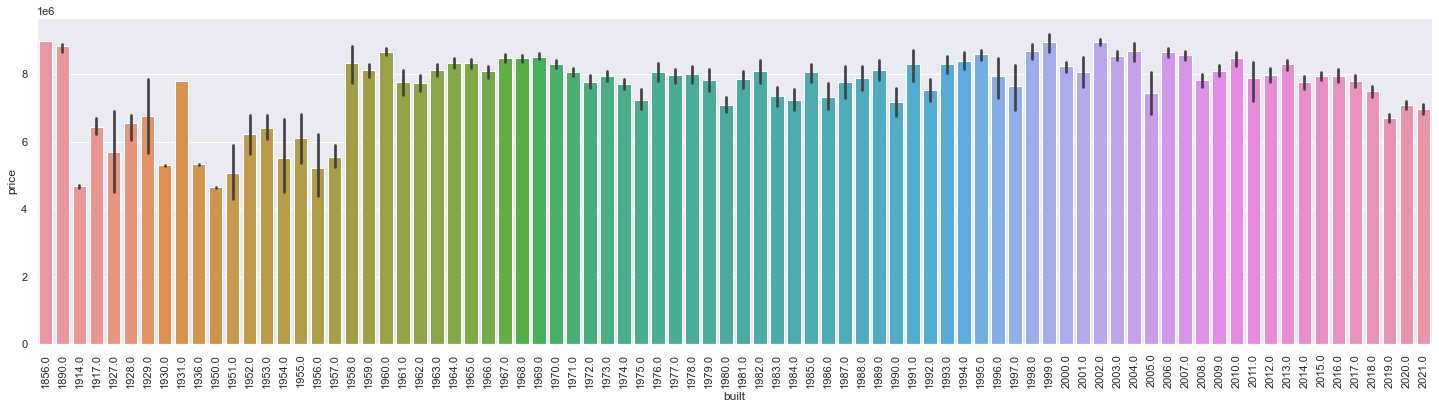

In [61]:
plt.figure(figsize=(25, 6))
bar_plot = sns.barplot(data=df, x="built", y="price")
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90);

In [62]:
rounded = df['general_sq'].round()

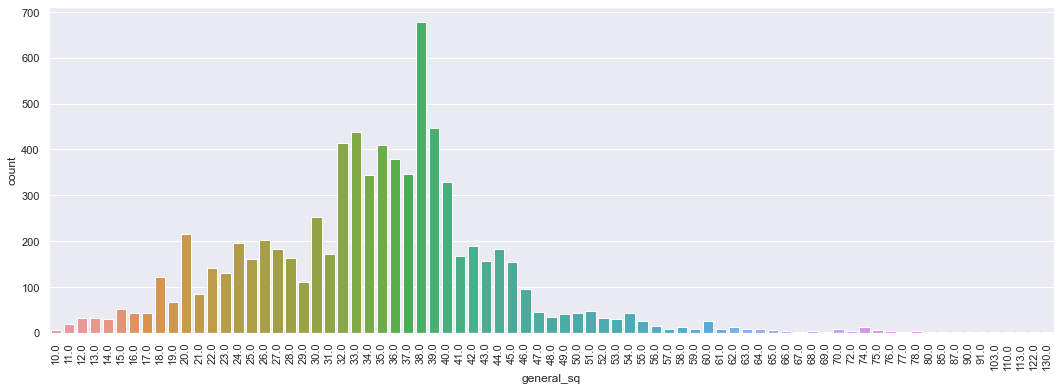

In [68]:
plt.figure(figsize=(18, 6))
general_sq_cnt_plt = sns.countplot(x=rounded)
general_sq_cnt_plt.set_xticklabels(general_sq_cnt_plt.get_xticklabels(), rotation=90);

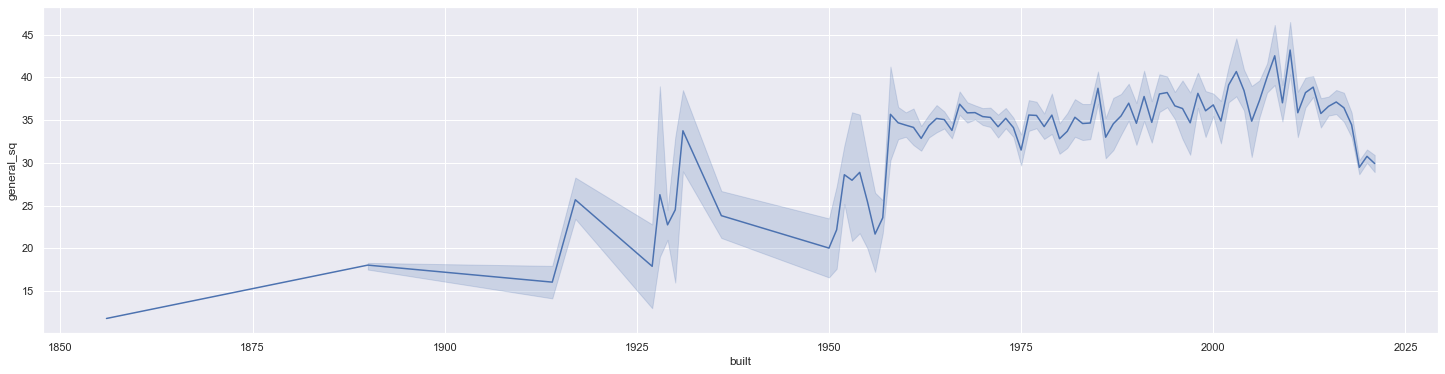

In [69]:
plt.figure(figsize=(25, 6))
sns.lineplot(data=df, x="built", y="general_sq");

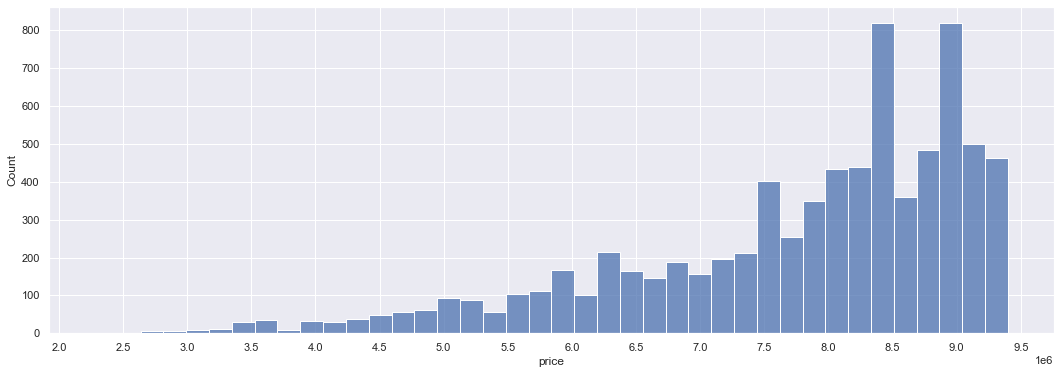

In [88]:
fig = plt.figure(figsize=(18, 6))
sns.histplot(df['price']);
fig.axes[0].xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5*10**6))

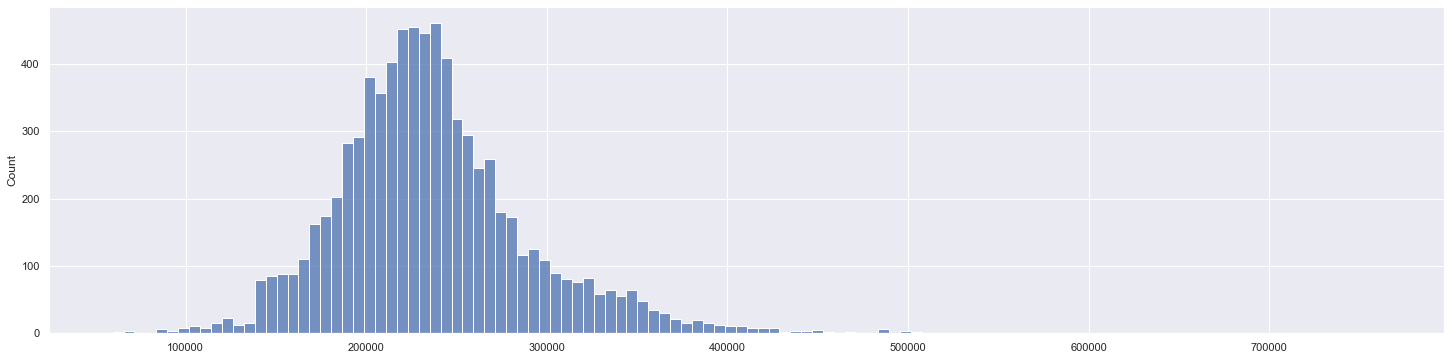

In [119]:
plt.figure(figsize=(25, 6))
sq_meter_price = df['price'] / df['general_sq']
sns.histplot(sq_meter_price);

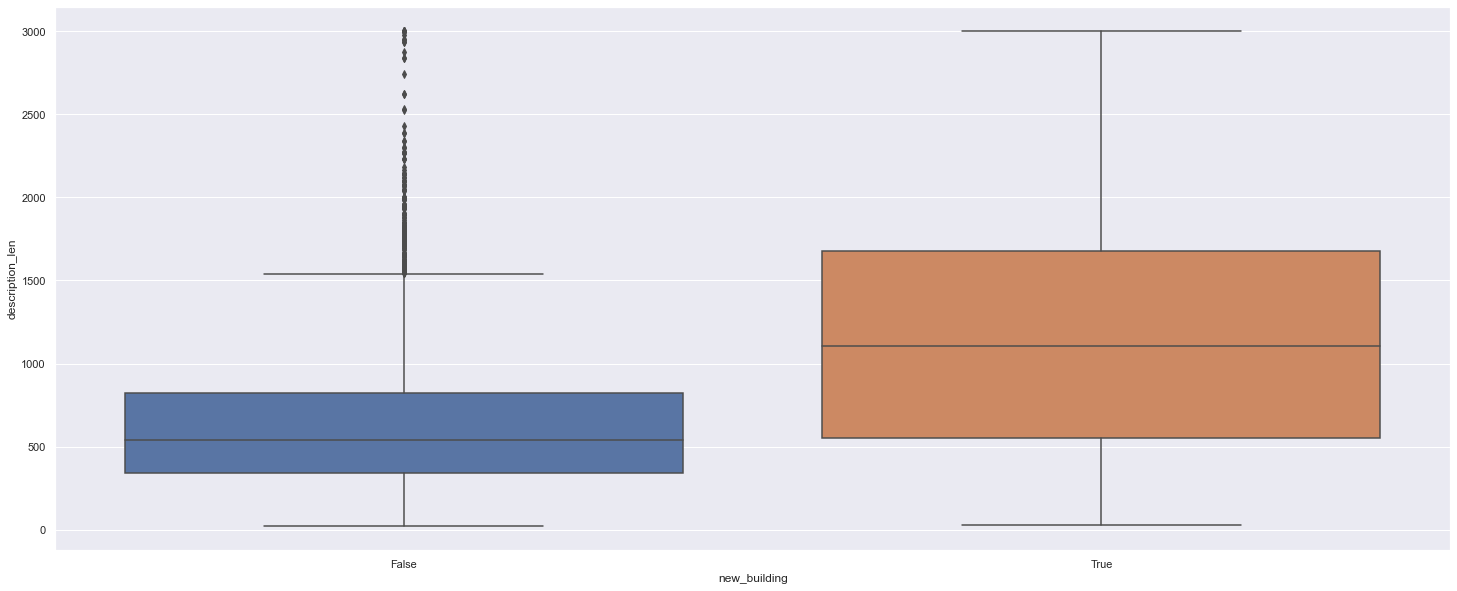

In [117]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=df, x="new_building", y="description_len");

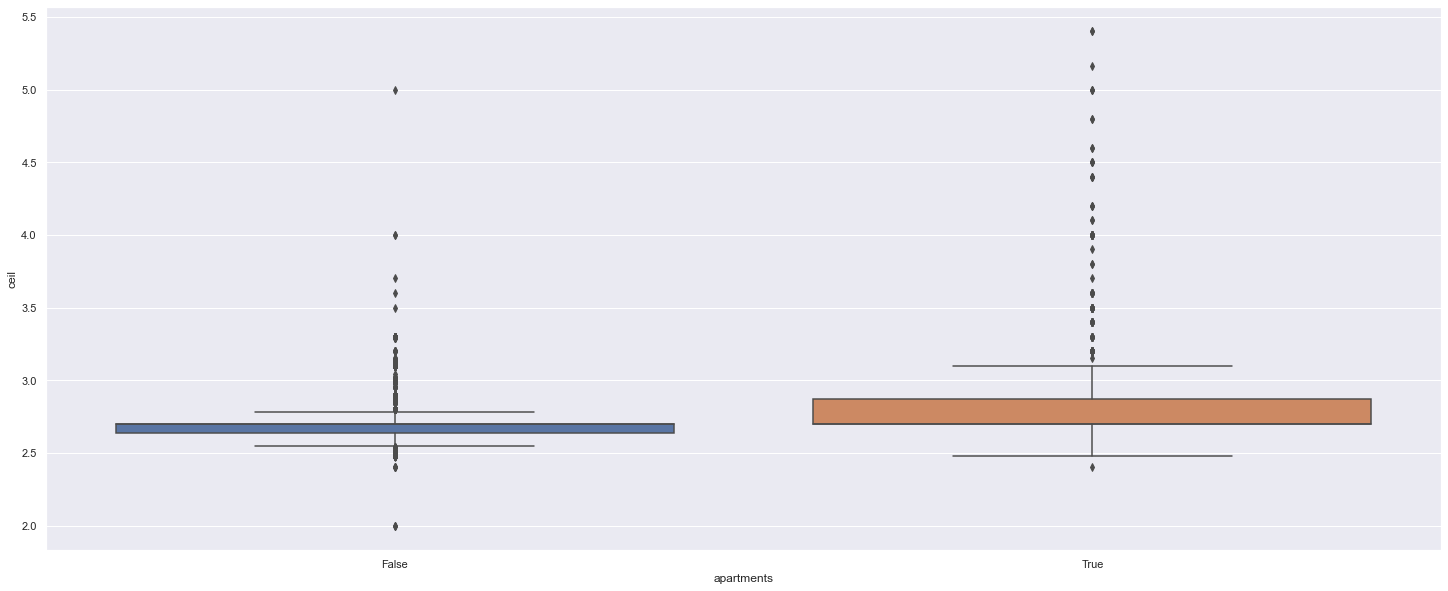

In [120]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=df, x="apartments", y="ceil");

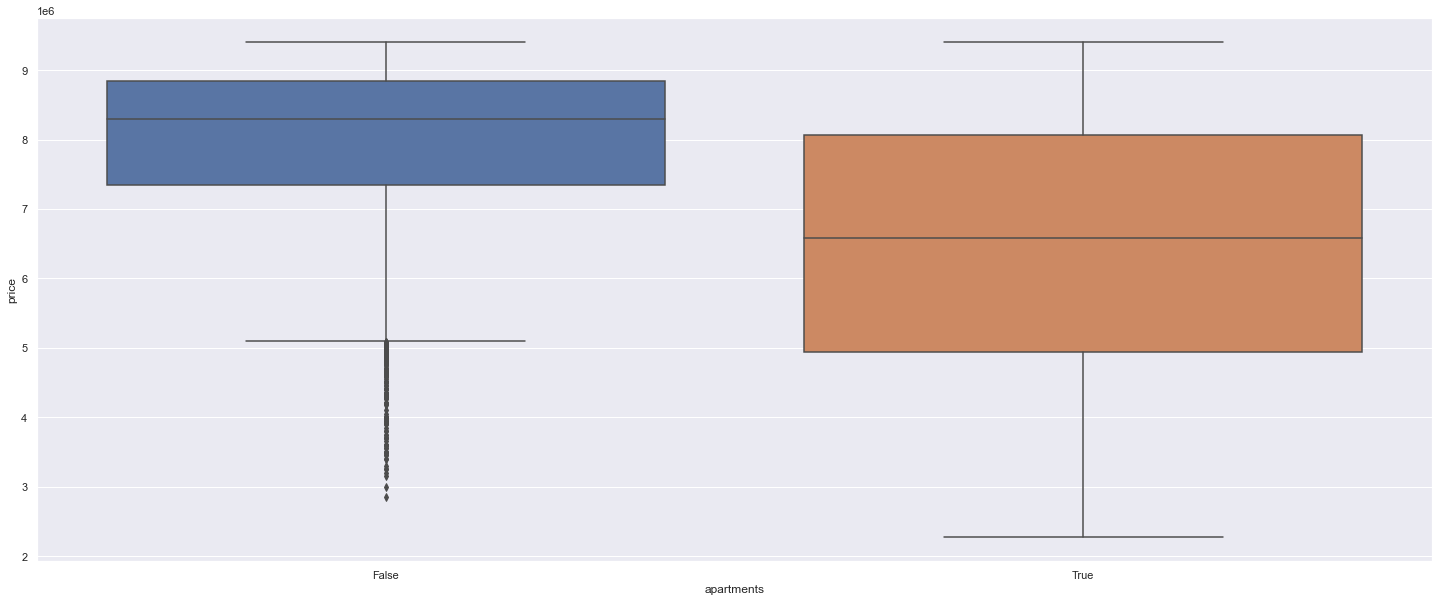

In [127]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=df, x="apartments", y="price");

<Figure size 1800x576 with 0 Axes>

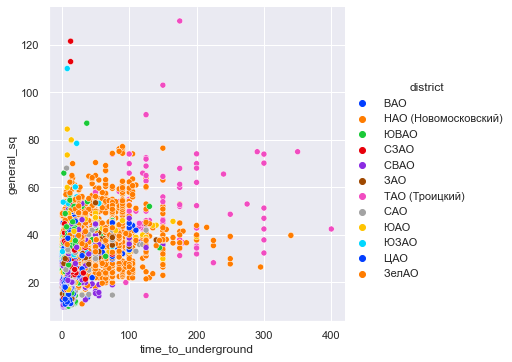

In [207]:
plt.figure(figsize=(25,8));
sns.relplot(data=df, x='time_to_underground', y='general_sq', hue='district', palette='bright');

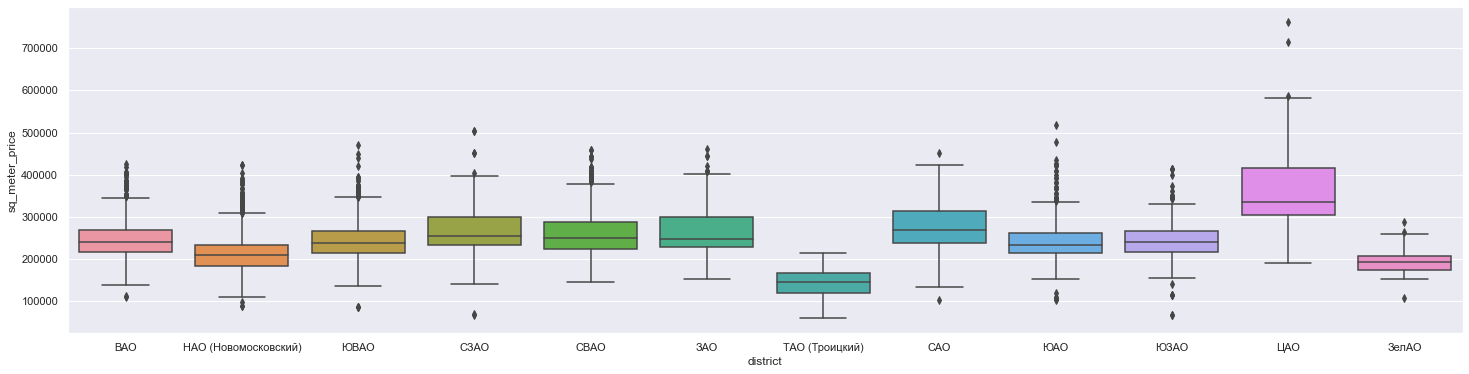

In [239]:
plt.figure(figsize=(25, 6))
sq_meter_price = df['price'] / df['general_sq']
df['sq_meter_price'] = sq_meter_price
sns.boxplot(x='district', y='sq_meter_price', data=df);

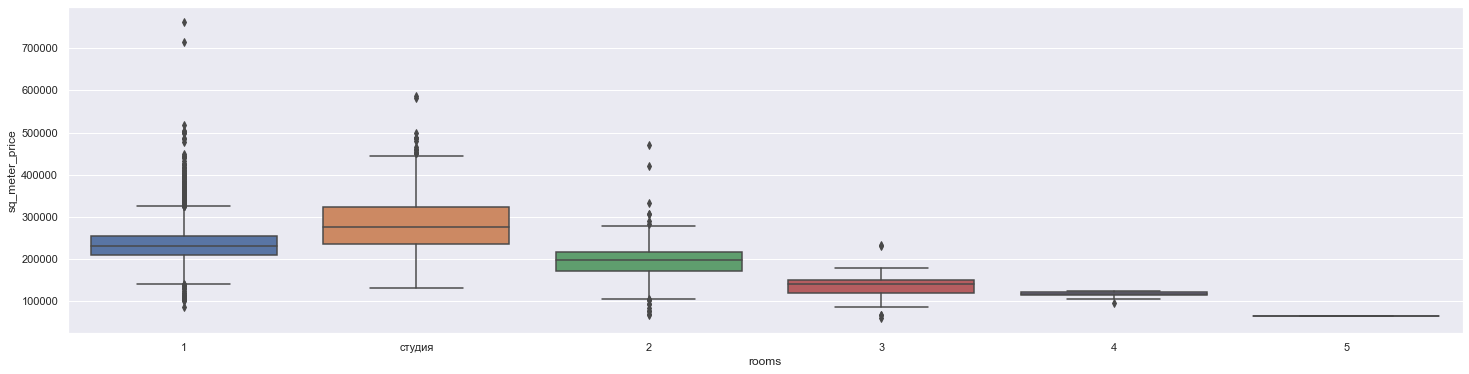

In [263]:
plt.figure(figsize=(25, 6))
sq_meter_price = df['price'] / df['general_sq']
df['sq_meter_price'] = sq_meter_price
sns.boxplot(x='rooms', y='sq_meter_price', data=df);

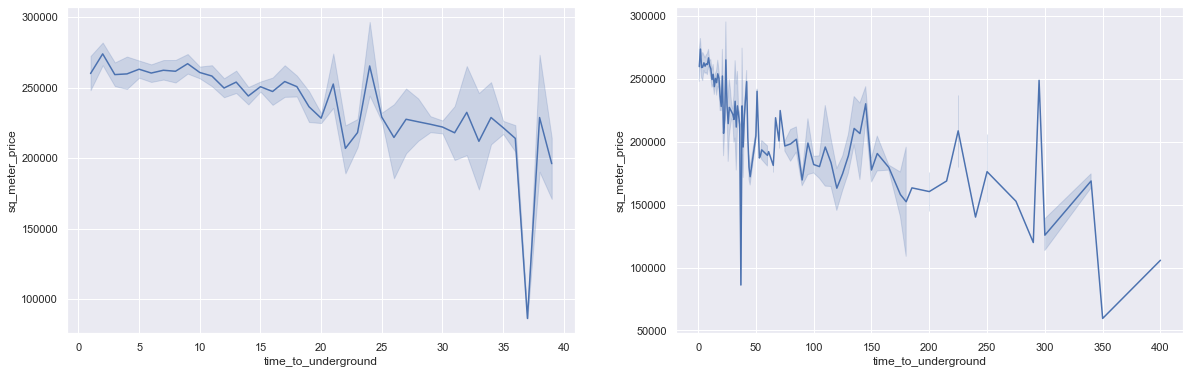

In [256]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.lineplot(x='time_to_underground', y='sq_meter_price', data=df[df['time_to_underground'] < 40], ax=axes[0]);
sns.lineplot(x='time_to_underground', y='sq_meter_price', data=df, ax=axes[1]);

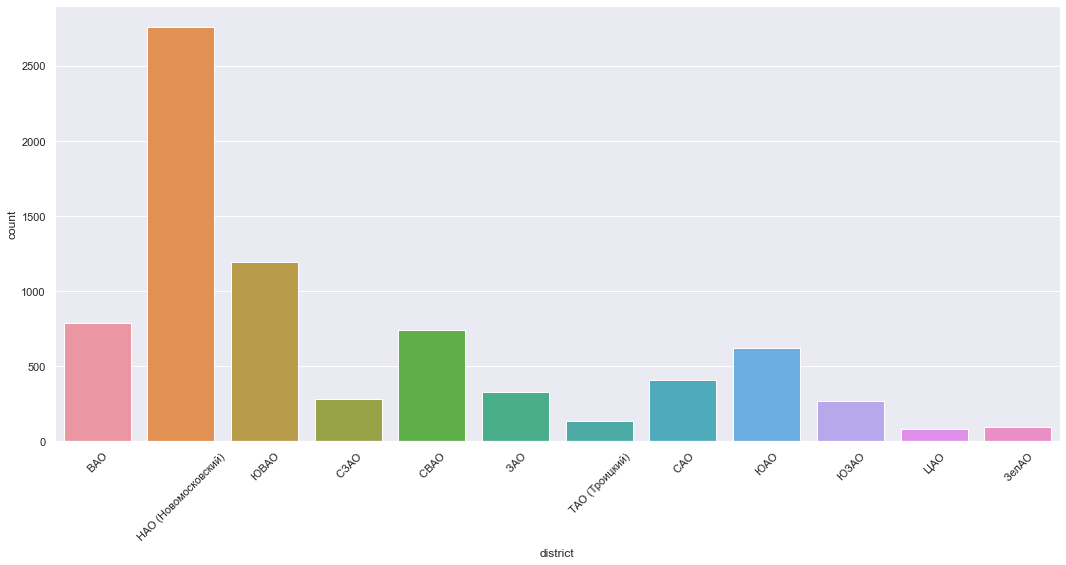

In [140]:
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='district')
ax = fig.axes[0]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

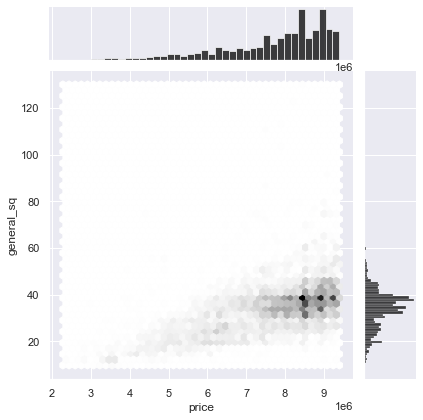

In [205]:
with plt.style.context('seaborn-dark-palette'):
    sns.jointplot(x='price', y='general_sq', data=df, kind='hex', color='black')
